In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

import random
random.seed(10)
print(random.random()) 
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

sc.settings.set_figure_params(dpi=80)
%matplotlib inline 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sc.set_figure_params(scanpy=True, fontsize=14 )
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

0.5714025946899135
-----
anndata     0.8.0
scanpy      1.9.3
-----
PIL                         9.4.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.1
cloudpickle                 3.0.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.12.3
dask                        2023.5.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.8.0
igraph                      0.10.1
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
jinja2                      3.0.3
joblib                      1.2.0
jupyter_server              1.18.1
kiwisolver                  1.4.4
leidenalg                   0.9.1
llvmlite     

In [2]:
def beautiful_cmap(initial_cmap="Reds", grey_intensity=0.2, color_intencity=0.1):
  
    from matplotlib import cm
    from matplotlib.colors import ListedColormap
    import numpy as np
    
    cm_color = cm.get_cmap(initial_cmap, 128)
    cm_grey = cm.get_cmap("Greys", 128)
    
    c = ListedColormap(
        np.vstack(
            (cm_grey(np.linspace(0.2, 0.2, 1)),
             cm_color(np.linspace(0.1, 1, 128)))
    ))
    
    return c

reds_cmap = beautiful_cmap()
blues_cmap = beautiful_cmap("Blues")
rb_cmap = beautiful_cmap("RdBu_r")


In [3]:
adata_epcam3=sc.read_h5ad('/home/julia/data/placodes/ANDYs_notebboks/For_paper/Epcam_resolution_for_annotat.h5ad')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


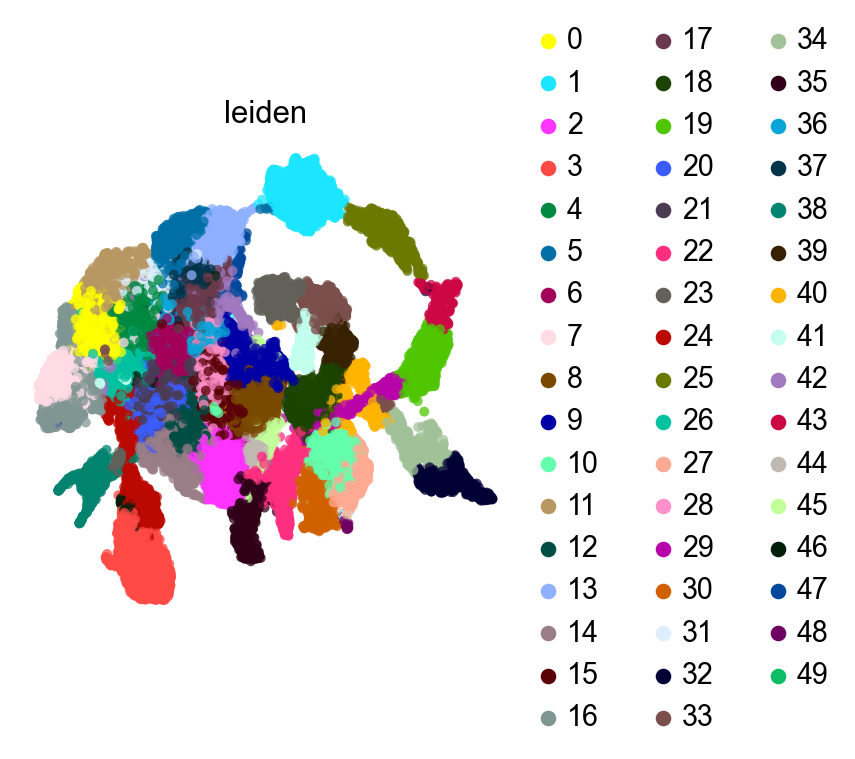

In [4]:
sc.pl.umap(adata_epcam3, color = ["leiden"], color_map = reds_cmap, frameon = False, size = 80, alpha = .75)

In [5]:
adata_epcam4=adata_epcam3.copy()

In [6]:
cluster_annotations = {
'0': 'rest', '1': 'rest', '2': 'Adenohypophyseal', '3': 'rest',
'4': 'rest','5': 'Otic','6': 'Epibranchial','7': 'rest', '8': 'Trigeminal',
'9': 'Epibranchial', '10': 'rest', '11': 'rest',  '12': 'rest','13': 'Otic',
'14': 'Adenohypophyseal', '15': 'Trigeminal', '16': 'rest','17': 'Epibranchial',
'18': 'rest','19': 'rest','20': 'rest', '21': 'rest','22': 'Lens','23': 'rest', '24': 'rest',
'25': 'rest', '26': 'rest', '27': 'rest', '28': 'Epibranchial','29': 'rest','30': 'rest',
'31': 'rest','32': 'rest','33': 'rest','34': 'rest',  '35': 'Olfactory','36': 'Epibranchial',
'37': 'Otic', '38': 'rest','39': 'rest','40': 'rest','41': 'rest','42': 'Otic',
'43': 'rest','44': 'rest','45': 'rest', '46': 'rest','47': 'Otic', '48': 'rest', '49': 'rest'   }
adata_epcam4.obs['cluster_annotations'] = adata_epcam4.obs['leiden'].map(cluster_annotations)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


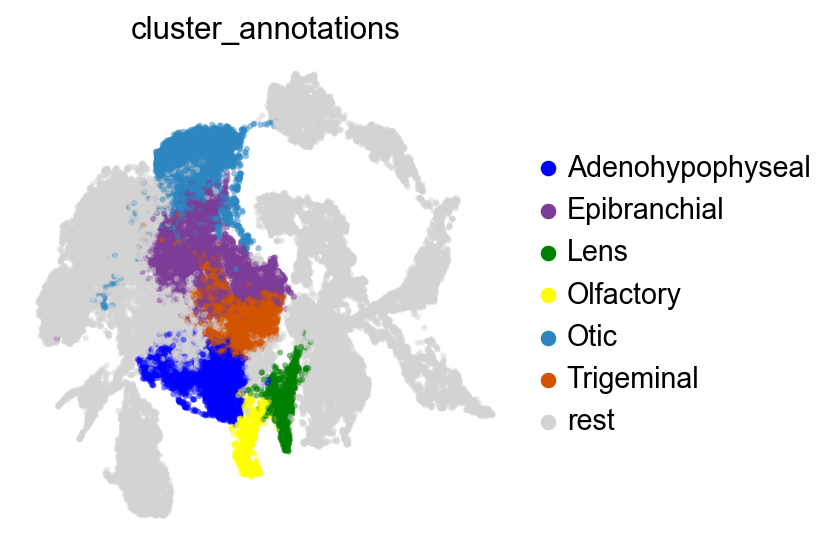

In [7]:
# Map annotations to clusters
adata_epcam4.obs['cluster_annotations'] = adata_epcam4.obs['leiden'].map(cluster_annotations)

# Convert to categorical dtype
adata_epcam4.obs['cluster_annotations'] = adata_epcam4.obs['cluster_annotations'].astype('category')

# Define the highlight colors
highlight_colors = {
    'Adenohypophyseal': 'blue',
    'Epibranchial': '#7d3c98',
    'Epibranchial neurulation': '#bb8fce',
    'Lens': 'green',
    'Olfactory': 'yellow',
    'Otic': '#2e86c1',
    'Otic vesicle': '#85c1e9',
    'Trigeminal': '#d35400',
    'Trigeminal  neurulation': '#eb984e',
    'rest': 'lightgray'  # Gray for "rest"
}

# Apply these colors to the clusters
adata_epcam4.uns['cluster_annotations_colors'] = [
    highlight_colors[cat] if cat in highlight_colors else 'lightgray'
    for cat in adata_epcam4.obs['cluster_annotations'].cat.categories
]

# Plot the UMAP with custom colors
sc.pl.umap(
    adata_epcam4,
    color='cluster_annotations',
    frameon=False,
    size=30,
    alpha=0.5,
    #save='epcam_all4.pdf'
)


In [8]:
with open('/home/julia/data/Scenic_database/Mouse/TF/allTFs_mm.txt', 'r') as file:
    list_TF = []
    for line in file.read().split('\n'):
            
                list_TF.append(line)
                
print(list_TF)

['Bcl6b', 'Zscan26', 'Mtf1', 'Klf9', 'Zic5', 'Zfp410', 'Zfp3', 'Zfp691', 'Zfp637', 'Egr3', 'Klf12', 'Bcl6', 'Tfap2a', 'Tfap2b', 'Tfap2c', 'Tfap2e', 'Arid3a', 'Arid5a', 'Ascl2', 'Tcf3', 'Bhlhe40', 'Myf6', 'Max', 'Mafk', 'Atf1', 'Jdp2', 'Mafb', 'Glis2', 'Plagl1', 'Osr2', 'Sp4', 'Klf7', 'Zbtb7b', 'Zic1', 'Egr1', 'Zfp281', 'Hic1', 'Zfp740', 'Osr1', 'Zbtb14', 'Zbtb12', 'Zscan4c', 'Zfp105', 'Zfp128', 'Zic2', 'Zic3', 'Zbtb3', 'E2f3', 'E2f2', 'Spi1', 'Elf3', 'Gabpa', 'Ehf', 'Spdef', 'Foxj3', 'Foxj1', 'Foxa2', 'Foxk1', 'Foxl1', 'Gata6', 'Gata3', 'Gata5', 'Gcm1', 'Six6', 'Nkx3-1', 'Hnf1a', 'Hoxa3', 'Irf9', 'Irf3', 'Irf4', 'Irf6', 'Irf5', 'Srf', 'Myb', 'Mybl1', 'Rxra', 'Hnf4a', 'Esrra', 'Nr2f2', 'Rara', 'Rfx4', 'Rfx7', 'Rfx3', 'Sp100', 'Gmeb1', 'Smad3', 'Tcf7', 'Hbp1', 'Cic', 'Bbx', 'Sox8', 'Tcf7l2', 'Sox17', 'Lef1', 'Sox30', 'Sox15', 'Sox5', 'Sox18', 'Sox12', 'Sox14', 'Tcf7l1', 'Sox21', 'Sox7', 'Sox11', 'Sry', 'Sox13', 'Sox4', 'Sox1', 'Eomes', 'Tbp', 'Cux1', 'Lhx2', 'Hoxb6', 'Hoxa10', 'Hoxa4', '

In [9]:
len(list_TF)

1861

In [10]:
adata_sub=adata_epcam4[adata_epcam4.obs['leiden'].isin(['2', '5', '6', '8', '9', '13', '14', '15', '17', '22', '28', '35', '36', '42', '47', '37'])]

In [11]:
adata_sub.obs

,plate,day,location,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,doublet_score,predicted_doublet,batch,leiden,cluster_annotations
AACCCAATCAGCTCTC-1,P27217_1001,e_8.5,head,5283,18334.0,779.0,4.248937,5283,0.021459,False,0,8,Trigeminal
AATGACCAGGAGTACC-1,P27217_1001,e_8.5,head,6514,39394.0,795.0,2.018074,6514,0.020701,False,0,28,Epibranchial
ACATCCCGTTGACTAC-1,P27217_1001,e_8.5,head,6789,34746.0,1145.0,3.295343,6789,0.027523,False,0,5,Otic
ACCCTCAAGCCACTCG-1,P27217_1001,e_8.5,head,6742,38994.0,531.0,1.361748,6742,0.071553,False,0,28,Epibranchial
ACTTAGGCAAATCCCA-1,P27217_1001,e_8.5,head,6140,29992.0,573.0,1.910510,6140,0.015994,False,0,17,Epibranchial
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTACGTCAGTCCGTG-1-3,E9_L006,E9,A,3740,8971.0,220.0,2.452347,3740,0.065880,False,14,35,Olfactory
TTTACTGAGATCCAAA-1-3,E9_L006,E9,A,5733,20303.0,355.0,1.748510,5733,0.012573,False,14,22,Lens
TTTAGTCCAGCAGTCC-1-3,E9_L006,E9,A,4188,12038.0,422.0,3.505566,4188,0.086538,False,14,22,Lens
TTTGATCTCTCGCTCA-1-3,E9_L006,E9,A,4263,11884.0,71.0,0.597442,4263,0.042963,False,14,22,Lens


In [12]:
# Subset AnnData to include only the TFs
tf_genes = [gene for gene in adata_sub.var_names if gene in list_TF]
adata_tf = adata_sub[:, tf_genes].copy()


In [13]:
adata_tf

AnnData object with n_obs × n_vars = 15136 × 1729
    obs: 'plate', 'day', 'location', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'doublet_score', 'predicted_doublet', 'batch', 'leiden', 'cluster_annotations'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cluster_annotations_colors', 'day_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'location_colors', 'log1p', 'neighbors', 'pca', 'plate_colors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [14]:
# Recalculate PCA and embeddings
sc.pp.scale(adata_tf)              # Optional: scale the data
sc.tl.pca(adata_tf, n_comps=100)  

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:00)


computing neighbors
    using 'X_pca' with n_pcs = 35
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:33)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


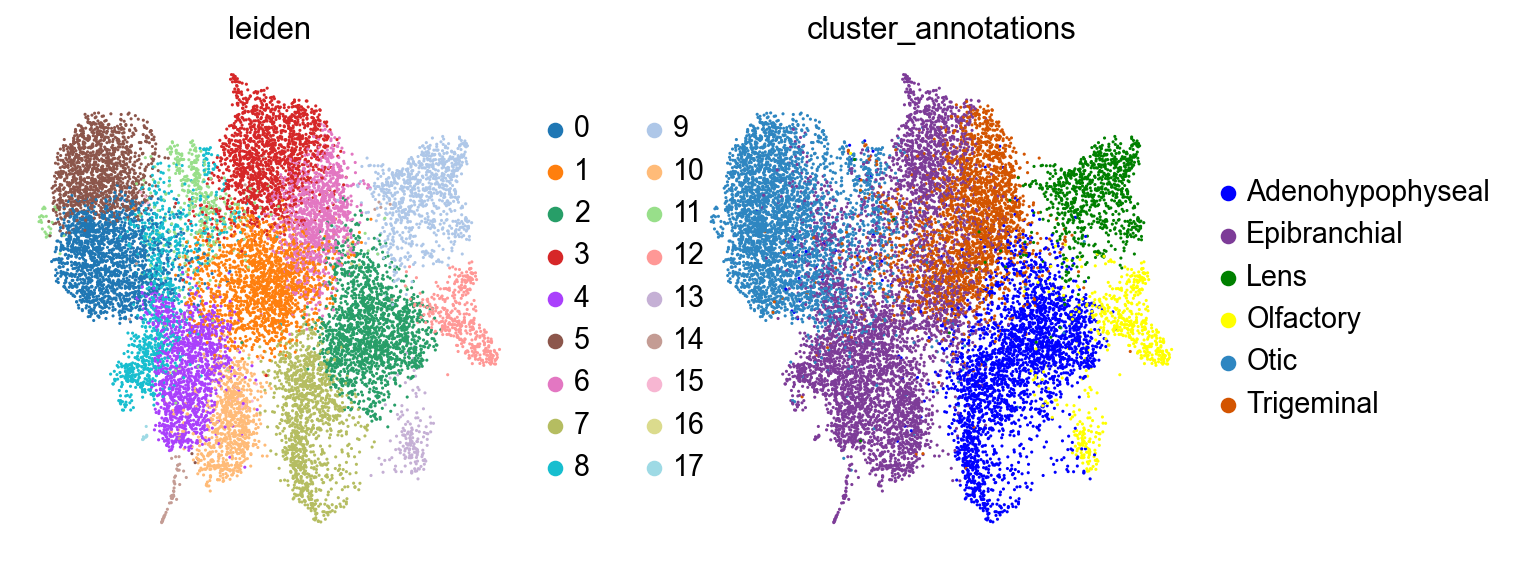

In [15]:
sc.pp.neighbors(adata_tf, n_neighbors=25, n_pcs=35)       # Recalculate the neighbor graph
sc.tl.umap(adata_tf)               # Calculate UMAP embedding
sc.tl.leiden(adata_tf, ) 
# Visualize the embedding
sc.pl.umap(adata_tf, color=["leiden", 'cluster_annotations'], frameon=False)  # Replace with the desired column in adata.obs


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


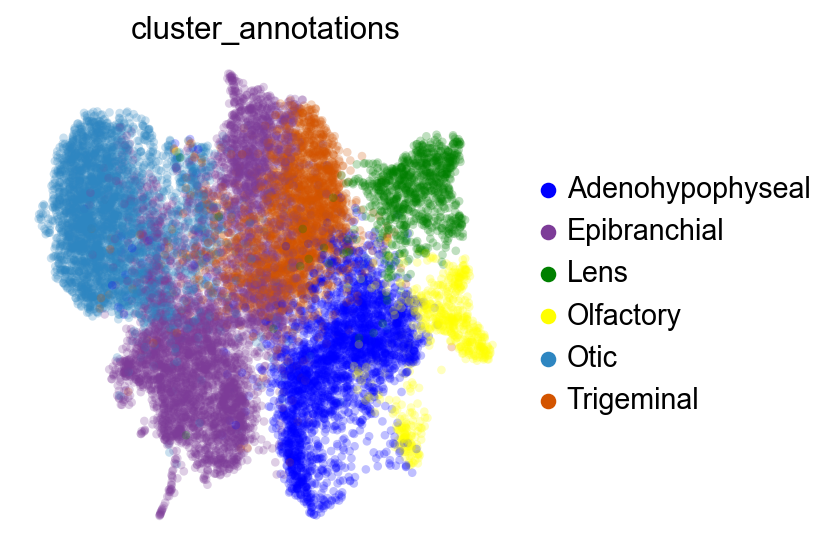

In [16]:
# Plot the UMAP with custom colors
sc.pl.umap(
    adata_tf,
    color='cluster_annotations',
    frameon=False,
    size=60,
    alpha=0.25,
  #save='epcam_TF_025.pdf'
)


In [17]:
adata_tf.write_h5ad('/home/julia/data/placodes/ANDYs_notebboks/For_paper/Epcam_on_TF_annotat.h5ad')